In [133]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [134]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 10.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [135]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [136]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('2017') if '.txt' in b.name]

In [137]:
all_books

[<DirEntry '2017.txt'>]

In [138]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)

On Friday, May 12, attackers spread a massive ransomware attack worldwide using the EternalBlue exploit to rapidly propagate the malware over corporate LANs and wireless networks. EternalBlue, originally exposed on April 14 as part of the Shadow Brokers dump of NSA hacking tools, leverages a vulnerability (MS17-010) in Microsoft Server Message Block (SMB) on TCP port 445 to discover vulnerable computers on a network and laterally spread malicious payloads of the attacker’s choice. This particular attack also appeared to use an NSA backdoor called DoublePulsar to actually install the ransomware known as WannaCry.

Over the subsequent weekend, however, we discovered another very large-scale attack using both EternalBlue and DoublePulsar to install the cryptocurrency miner Adylkuzz. Initial statistics suggest that this attack may be larger in scale than WannaCry: because this attack shuts down SMB networking to prevent further infections with other malware (including the WannaCry worm) vi

In [139]:
all_entities = NER(book_text)

In [140]:
entity_types_to_remove = ["CARDINAL", "TIME", "DATE", "ORDINAL", "QUANTITY", "PERCENT", "MONEY"]
filtered_entities =[ent.text for ent in all_entities.ents if ent.label_ not in entity_types_to_remove]
print(filtered_entities)

['EternalBlue', 'EternalBlue', 'Shadow Brokers', 'NSA', 'Microsoft', 'SMB', 'TCP', 'NSA', 'DoublePulsar', 'WannaCry', 'EternalBlue', 'DoublePulsar', 'Adylkuzz', 'WannaCry', 'SMB', 'WannaCry', 'WannaCry', 'Windows', 'WannaCry', 'Adylkuzz', 'Adylkuzz', 'WannaCry', 'WannaCry', 'Discovery', 'WannaCry', 'EternalBlue', 'WannaCry', 'Adylkuzz', 'Adylkuzz', 'EternalBlue', 'DoublePulsar', 'DoublePulsar', 'Adylkuzz', 'TCP', 'EternalBlue', 'DoublePulsar', 'DoublePulsar', 'Adylkuzz', 'Adylkuzz', 'SMB', 'Adylkuzz', 'C&C', 'Adylkuzz', 'Adylkuzz', 'Monero', 'Bitcoin', 'Monero', 'AlphaBay', 'Monero', 'Moneros', 'Adylkuzz', 'Monero', 'Bitcoin', 'Adylkuzz', 'Monero', 'Adylkuzz', 'SMB', 'Monero Mining', 'Monero', 'Moneros', 'Monero', 'Adylkuzz', 'Monero', 'Adylkuzz', 'Adylkuzz', 'Moneros', 'Adylkuzz', 'Adylkuzz', 'Monero', 'Adylkuzz', 'Monero', 'Adylkuzz', 'Monero', 'Adylkuzz', 'Monero', 'Adylkuzz', 'Adylkuzz', 'C&C', 'Monero', 'Adylkuzz', 'C&C', 'WannaCry', 'NSA', 'Microsoft Windows', 'Adylkuzz', 'WannaC

In [141]:
# Visualize identified entities
displacy.render(all_entities[0:2000], style="ent", jupyter=True)

## Get named entity list per sentence

In [142]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in all_entities.sents:
    entity_list = [ent.text for ent in sent.ents if ent.label_ not in entity_types_to_remove]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
print(sent_entity_df.head(10))

                                            sentence  \
0  (On, Friday, ,, May, 12, ,, attackers, spread,...   
1  (EternalBlue, ,, originally, exposed, on, Apri...   
2  (This, particular, attack, also, appeared, to,...   
3  (Over, the, subsequent, weekend, ,, however, ,...   
4  (Initial, statistics, suggest, that, this, att...   
5  (Symptoms, of, this, attack, include, loss, of...   
6  (Several, large, organizations, reported, netw...   
7  (However, ,, because, of, the, lack, of, ranso...   
8  (However, ,, it, should, be, noted, that, the,...   
9  (This, attack, is, ongoing, and, ,, while, les...   

                                            entities  
0                                      [EternalBlue]  
1  [EternalBlue, Shadow Brokers, NSA, Microsoft, ...  
2                      [NSA, DoublePulsar, WannaCry]  
3              [EternalBlue, DoublePulsar, Adylkuzz]  
4                [WannaCry, SMB, WannaCry, WannaCry]  
5                                          [Windows] 

In [143]:
sent_entity_df

,sentence,entities
0,"(On, Friday, ,, May, 12, ,, attackers, spread,...",[EternalBlue]
1,"(EternalBlue, ,, originally, exposed, on, Apri...","[EternalBlue, Shadow Brokers, NSA, Microsoft, ..."
2,"(This, particular, attack, also, appeared, to,...","[NSA, DoublePulsar, WannaCry]"
3,"(Over, the, subsequent, weekend, ,, however, ,...","[EternalBlue, DoublePulsar, Adylkuzz]"
4,"(Initial, statistics, suggest, that, this, att...","[WannaCry, SMB, WannaCry, WannaCry]"
5,"(Symptoms, of, this, attack, include, loss, of...",[Windows]
6,"(Several, large, organizations, reported, netw...",[WannaCry]
7,"(However, ,, because, of, the, lack, of, ranso...",[Adylkuzz]
8,"(However, ,, it, should, be, noted, that, the,...","[Adylkuzz, WannaCry]"
9,"(This, attack, is, ongoing, and, ,, while, les...",[WannaCry]


In [144]:
# Filter out sentences that don't have any entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities
0,"(On, Friday, ,, May, 12, ,, attackers, spread,...",[EternalBlue]
1,"(EternalBlue, ,, originally, exposed, on, Apri...","[EternalBlue, Shadow Brokers, NSA, Microsoft, ..."
2,"(This, particular, attack, also, appeared, to,...","[NSA, DoublePulsar, WannaCry]"
3,"(Over, the, subsequent, weekend, ,, however, ,...","[EternalBlue, DoublePulsar, Adylkuzz]"
4,"(Initial, statistics, suggest, that, this, att...","[WannaCry, SMB, WannaCry, WannaCry]"
5,"(Symptoms, of, this, attack, include, loss, of...",[Windows]
6,"(Several, large, organizations, reported, netw...",[WannaCry]
7,"(However, ,, because, of, the, lack, of, ranso...",[Adylkuzz]
8,"(However, ,, it, should, be, noted, that, the,...","[Adylkuzz, WannaCry]"
9,"(This, attack, is, ongoing, and, ,, while, les...",[WannaCry]


In [145]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities
0,"(On, Friday, ,, May, 12, ,, attackers, spread,...",[EternalBlue]
1,"(EternalBlue, ,, originally, exposed, on, Apri...","[EternalBlue, Shadow Brokers, NSA, Microsoft, ..."
2,"(This, particular, attack, also, appeared, to,...","[NSA, DoublePulsar, WannaCry]"
3,"(Over, the, subsequent, weekend, ,, however, ,...","[EternalBlue, DoublePulsar, Adylkuzz]"
4,"(Initial, statistics, suggest, that, this, att...","[WannaCry, SMB, WannaCry, WannaCry]"
...,...,...
233,"(Trend, Micro, Solutions, \n\n, Email, and, we...","[Trend Micro Solutions, Trend Micro™ Deep Disc..."
234,"(At, the, endpoint, level, ,, Trend, Micro, Sm...",[Trend Micro Smart Protection Suites]
235,"(Trend, Micro, Endpoint, Sensor, will, also, b...","[Trend Micro Endpoint Sensor, WMI]"
236,"(Trend, Micro, ™, Deep, Discovery, ™, Inspecto...","[Trend Micro™ Deep Discovery, C&C, Trend Micro..."


## Create relationships

In [146]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [147]:
relationship_df = pd.DataFrame(relationships)

In [148]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,EternalBlue,Shadow Brokers
1,Shadow Brokers,NSA
2,NSA,Microsoft
3,Microsoft,SMB
4,SMB,TCP
5,TCP,NSA
6,NSA,DoublePulsar
7,DoublePulsar,WannaCry
8,WannaCry,EternalBlue
9,EternalBlue,DoublePulsar


In [149]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,EternalBlue,Shadow Brokers
1,NSA,Shadow Brokers
2,Microsoft,NSA
3,Microsoft,SMB
4,SMB,TCP
5,NSA,TCP
6,DoublePulsar,NSA
7,DoublePulsar,WannaCry
8,EternalBlue,WannaCry
9,DoublePulsar,EternalBlue


In [150]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [151]:
relationship_df.head(10)

,source,target,value
0,EternalBlue,Shadow Brokers,8
1,NSA,Shadow Brokers,8
2,Microsoft,NSA,8
3,Microsoft,SMB,26
4,SMB,TCP,19
5,NSA,TCP,7
6,DoublePulsar,NSA,15
7,DoublePulsar,WannaCry,9
8,EternalBlue,WannaCry,68
9,DoublePulsar,EternalBlue,22


## Graph analysis and visualization

In [152]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

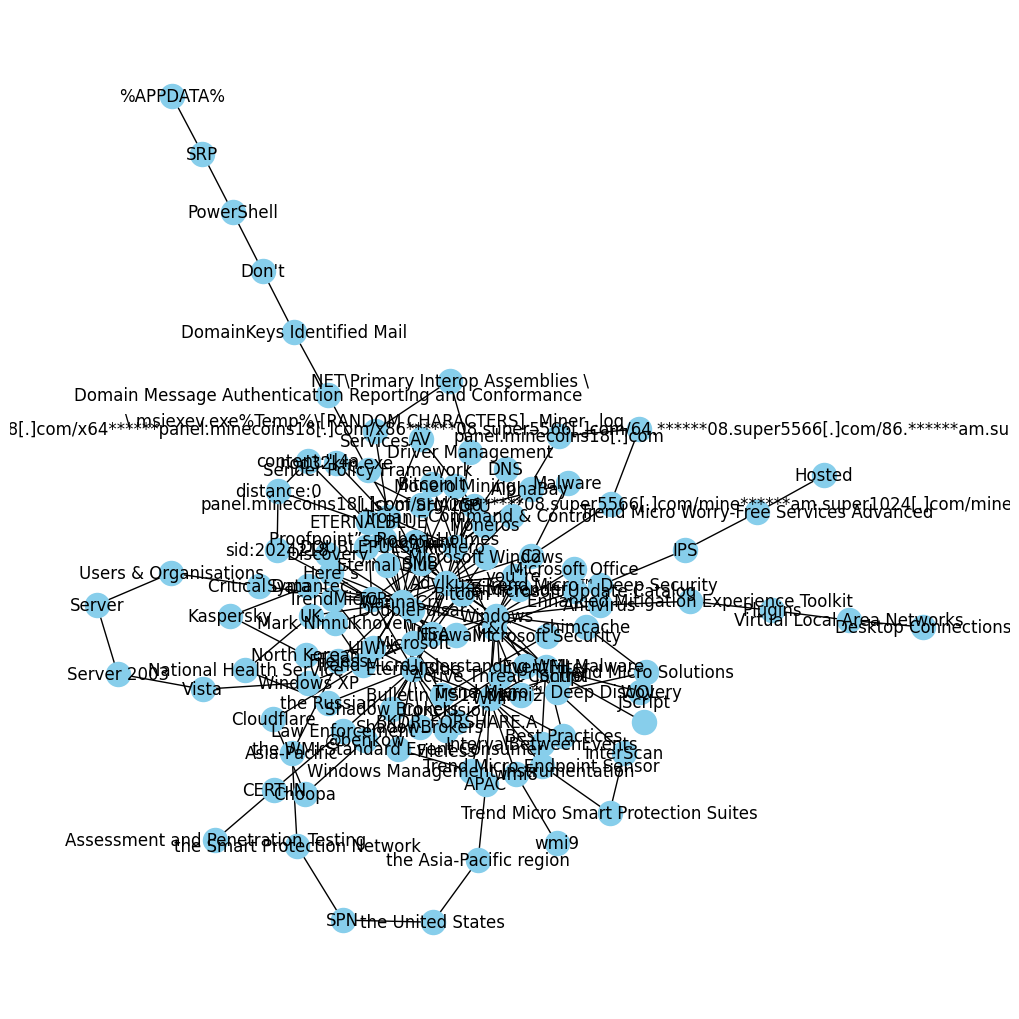

In [153]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [154]:
import networkx as nx
from pyvis.network import Network

# Assuming G is already defined
# Set node attributes for size based on node degree
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

# Filter nodes with size greater than 5
filtered_nodes = {node: size for node, size in nx.get_node_attributes(G, 'size').items() if size > 5}

# Create a subgraph containing only the filtered nodes
subgraph = G.subgraph(filtered_nodes.keys())

# Create a Pyvis Network instance
net = Network(notebook=True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

# Convert the subgraph to Pyvis format
net.from_nx(subgraph)

# Show the network
net.show("witcher.html")


witcher.html


### The most important characters in The Witcher

In [155]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'EternalBlue': 0.12820512820512822,
 'Shadow Brokers': 0.017094017094017096,
 'NSA': 0.06837606837606838,
 'Microsoft': 0.08547008547008547,
 'SMB': 0.08547008547008547,
 'TCP': 0.08547008547008547,
 'DoublePulsar': 0.042735042735042736,
 'WannaCry': 0.20512820512820515,
 'Adylkuzz': 0.17948717948717952,
 'Windows': 0.1452991452991453,
 'Discovery': 0.008547008547008548,
 'C&C': 0.07692307692307693,
 'Monero': 0.12820512820512822,
 'Bitcoin': 0.025641025641025644,
 'AlphaBay': 0.008547008547008548,
 'Moneros': 0.017094017094017096,
 'Monero Mining': 0.017094017094017096,
 'Microsoft Windows': 0.017094017094017096,
 'Trend Micro': 0.03418803418803419,
 'Cloudflare': 0.017094017094017096,
 'Choopa': 0.017094017094017096,
 '@benkow': 0.017094017094017096,
 'ETERNALBLUE': 0.05128205128205129,
 'DOUBLEPULSAR': 0.03418803418803419,
 'BitcoinIt': 0.017094017094017096,
 'FirewallIt': 0.017094017094017096,
 'C2': 0.03418803418803419,
 'Malware': 0.017094017094017096,
 'CPU': 0.0341880341880341

<Axes: >

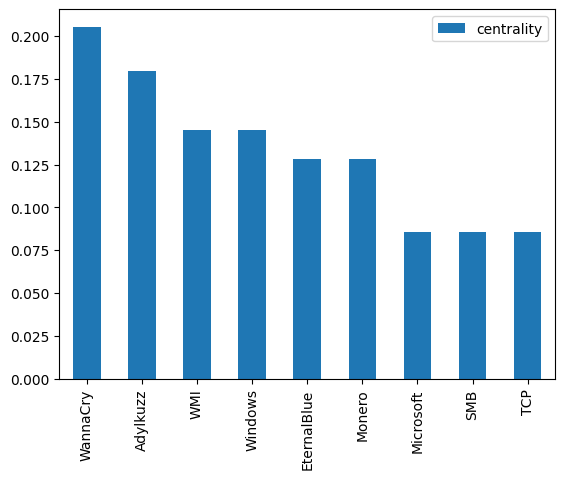

In [156]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

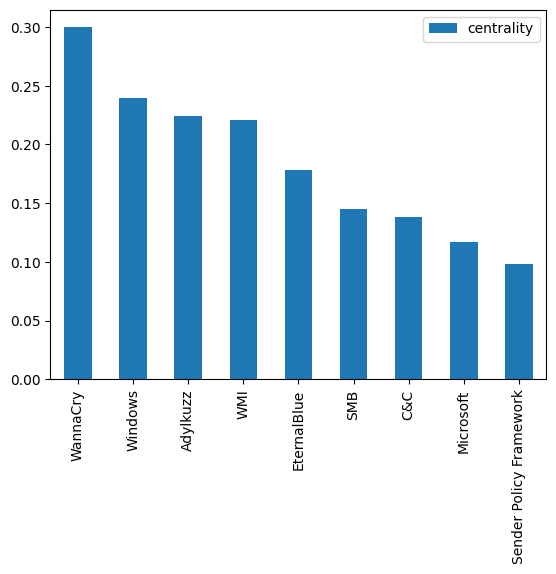

In [157]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

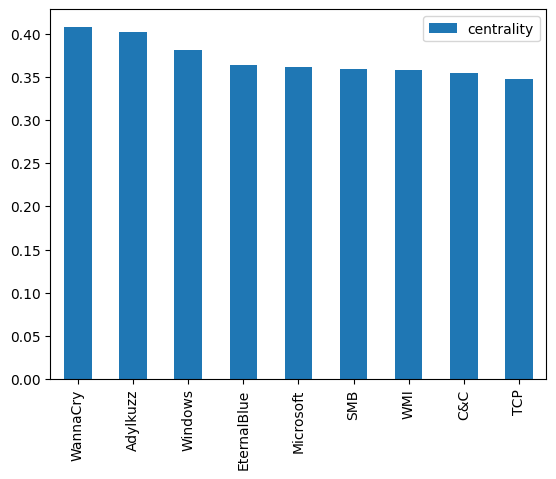

In [158]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [159]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [160]:
!pip install python-louvain

### Community detection

In [161]:
from community import community_louvain

In [162]:
communities = community_louvain.best_partition(G)

In [163]:
communities

{'EternalBlue': 0,
 'Shadow Brokers': 0,
 'NSA': 0,
 'Microsoft': 3,
 'SMB': 2,
 'TCP': 2,
 'DoublePulsar': 0,
 'WannaCry': 3,
 'Adylkuzz': 4,
 'Windows': 8,
 'Discovery': 3,
 'C&C': 6,
 'Monero': 4,
 'Bitcoin': 4,
 'AlphaBay': 4,
 'Moneros': 4,
 'Monero Mining': 2,
 'Microsoft Windows': 0,
 'Trend Micro': 3,
 'Cloudflare': 0,
 'Choopa': 0,
 '@benkow': 0,
 'ETERNALBLUE': 2,
 'DOUBLEPULSAR': 2,
 'BitcoinIt': 2,
 'FirewallIt': 2,
 'C2': 4,
 'Malware': 4,
 'CPU': 4,
 'DNS': 4,
 'Driver Management': 4,
 'NET\\Primary Interop Assemblies \\': 4,
 '\\ msiexev.exe%Temp%\\[RANDOM CHARACTERS]._Miner_.log\nServices': 4,
 'Trojan': 4,
 'nod32krn.exe': 4,
 'List of SHA256': 4,
 'Command & Control': 4,
 'panel.minecoins18[.]com': 4,
 'panel.minecoins18[.]com/x64******panel.minecoins18[.]com/x86******08.super5566[.]com/64.******08.super5566[.]com/86.******am.super1024[.]com/64.******am.super1024[.]com/86': 4,
 'panel.minecoins18[.]com/argline******08.super5566[.]com/mine******am.super1024[.]com/mine*

In [164]:
nx.set_node_attributes(G, communities, 'group')

In [165]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("v2017.html")

v2017.html


### Evolution of characters' importance

In [166]:
from lib.utils.functions import *

In [167]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('2017') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [168]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)


AttributeError: 'DataFrame' object has no attribute 'character_entities'

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()